# Student Information
Name: Meng Rui
Student ID: 122090405

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Put your imports here
import librosa 
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw
# ...

# Question 1

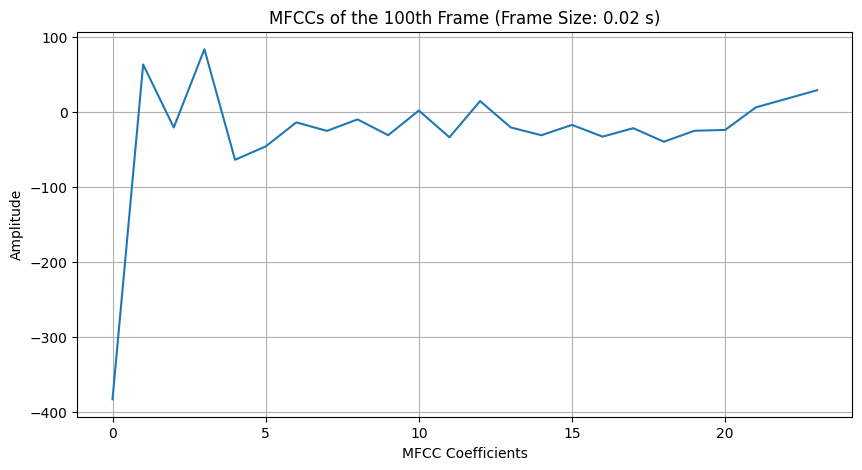

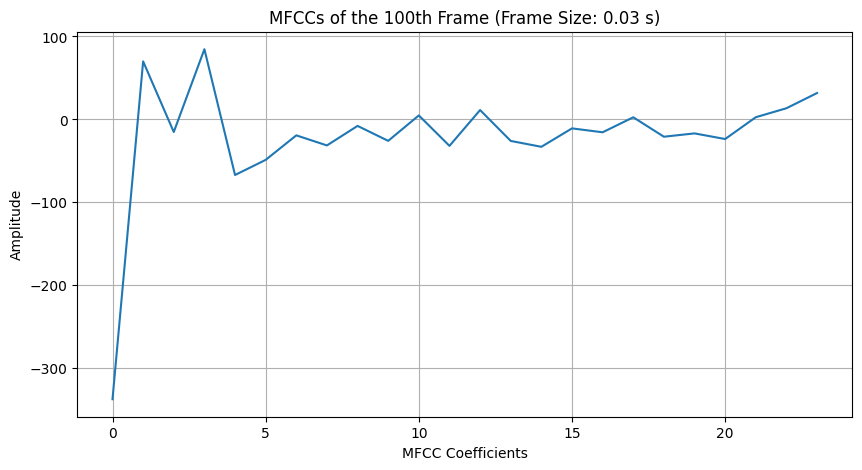

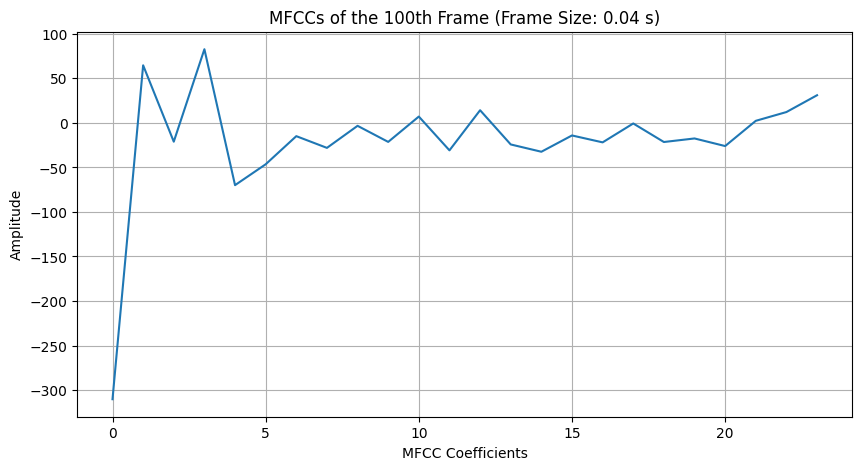

In [3]:
%matplotlib inline

y,sr = librosa.load('/Users/mengrui/Desktop/reference.wav', sr = 16000)
frame_sizes=[0.02,0.03,0.04]
for frame_size in frame_sizes:
    n_fft = int(frame_size*sr)
    mfccs=librosa.feature.mfcc(y=y, sr=sr, n_mfcc=24, n_fft=n_fft,hop_length=512)

    mfcc_frame = mfccs[:, 99]

    plt.figure(figsize=(10,5))
    plt.plot(mfcc_frame)
    plt.title(f'MFCCs of the 100th Frame (Frame Size: {frame_size:.2f} s)')
    plt.xlabel('MFCC Coefficients')
    plt.ylabel('Amplitude')
    plt.grid()
plt.show()


# Question 2

In [4]:
y,sr = librosa.load('/Users/mengrui/Desktop/myspeech.wav', sr=None)
target_sr=16000
y_resampled = librosa.resample(y,orig_sr=sr,target_sr=target_sr)
output_file='resample_file.wav'
sf.write(output_file,y_resampled,target_sr,subtype='PCM_24')

print(f"resemple is done, the output file is saved as {output_file}")


resemple is done, the output file is saved as resample_file.wav


# Question 3

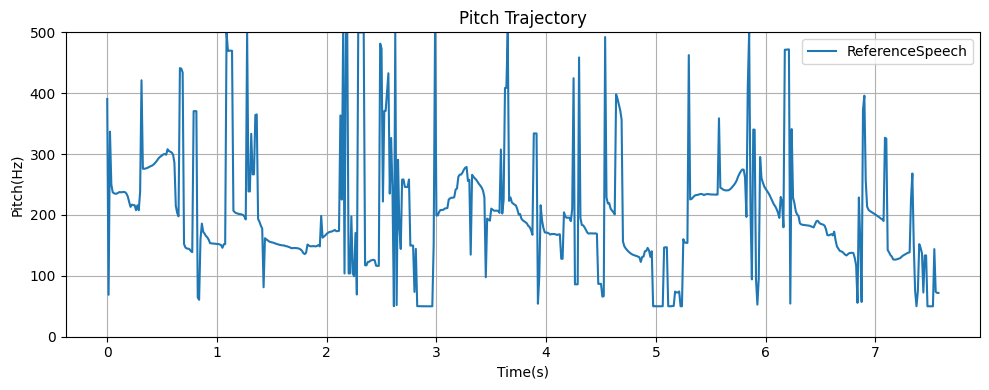

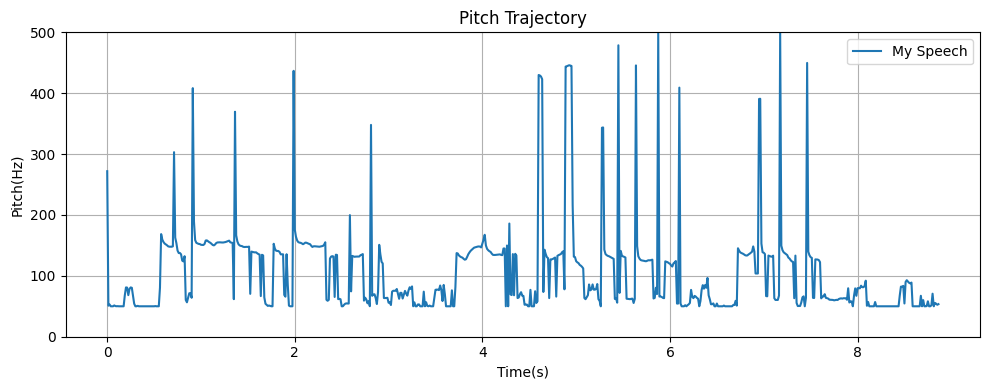

In [5]:
%matplotlib inline

def extract_and_plot_pitch(file_path,label):
    y,sr = librosa.load(file_path, sr = 16000)
    hop_length = 200

    pitch = librosa.yin(y,fmin=50, fmax=500, sr=sr, hop_length=hop_length)

    times = np.arange(len(pitch))*hop_length/sr

    plt.figure(figsize=(10,4))
    plt.plot(times,pitch,label=label)
    plt.xlabel('Time(s)')
    plt.ylabel('Pitch(Hz)')
    plt.title('Pitch Trajectory')
    plt.ylim(0,500)
    plt.legend()
    plt.grid()
    plt.tight_layout()

extract_and_plot_pitch('/Users/mengrui/Desktop/reference.wav','ReferenceSpeech')
extract_and_plot_pitch('/Users/mengrui/Desktop/myspeech.wav', 'My Speech')

plt.show()


# Question 4

## 4.1

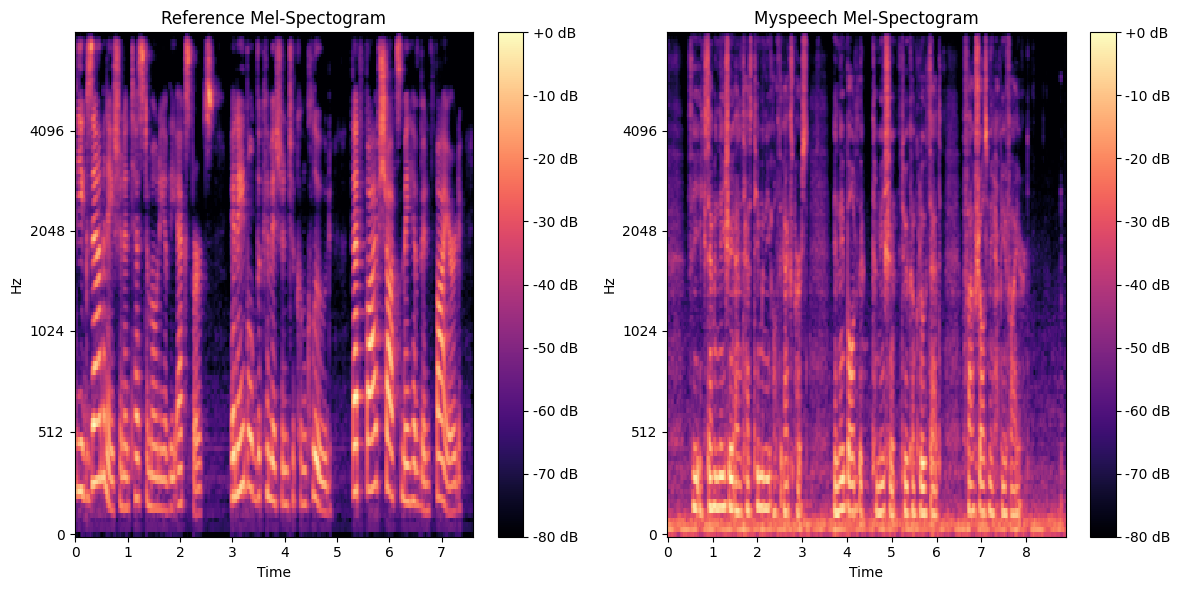

In [36]:
%matplotlib inline
y_reference,sr_1=librosa.load('/Users/mengrui/Desktop/reference.wav', sr=16000)
y_myspeech,sr_2=librosa.load('/Users/mengrui/Desktop/resample_file.wav', sr=16000)

mel_reference = librosa.feature.melspectrogram(y=y_reference,sr = sr_1)
mel_myspeech = librosa.feature.melspectrogram(y=y_myspeech,sr=sr_2)

log_mel_reference = librosa.power_to_db(mel_reference, ref=np.max)
log_mel_myspeech = librosa.power_to_db(mel_myspeech, ref=np.max)

distance, path= fastdtw(log_mel_reference.T, log_mel_myspeech.T, dist = euclidean)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
librosa.display.specshow(log_mel_reference, sr=sr_1, x_axis='time', y_axis='mel')
plt.title('Reference Mel-Spectogram') 
plt.colorbar(format= '%+2.0f dB')

plt.subplot(1,2,2)
librosa.display.specshow(log_mel_myspeech, sr=sr_2,x_axis='time', y_axis='mel')
plt.title('Myspeech Mel-Spectogram')
plt.colorbar(format= '%+2.0f dB')

plt.tight_layout()
plt.show()


## 4.2
[answer the question] We have already known that the word "Commission" is spoken in [3.6s, 4.1s] of reference.wav. And from 4.1 we have already aligned the mel-spectrograms of reference.wav and myspeech.wav. Right now we have know the time of word "Commission" in reference.wav, so first we will calculate the start time sample index of the word " Commission" in reference.wav. Then we will extract indices correspond to start index. Relative opreation could be realized by iterating each tuple in the DTW path and find out those time frame index in the reference.wav which is greater than or equal to the stating sample index. Thus we have a reference_indices list which contain the matching indices.
After that we can pick out frame indices in myspeech.wav by add the time frame index of which is present in reference_indices list. Thus we get the timw frame indices of myspeech.wav which consists of "Commission". And finally by subtrat sr we can get the actual time of two sides , which is the beginning and ending time of "Commission" in myspeech.wav.

In [6]:
y_reference,sr_1=librosa.load('/Users/mengrui/Desktop/reference.wav', sr=16000)
y_myspeech,sr_2=librosa.load('/Users/mengrui/Desktop/myspeech.wav', sr=16000)
frame_length = 2048
hop_length = 512
mel_reference = librosa.feature.melspectrogram(y=y_reference,sr = sr_1, n_fft=frame_length, hop_length=hop_length)
mel_myspeech = librosa.feature.melspectrogram(y=y_myspeech,sr=sr_2,n_fft=frame_length, hop_length=hop_length)
log_mel_reference = librosa.power_to_db(mel_reference, ref=np.max)
log_mel_myspeech = librosa.power_to_db(mel_myspeech, ref=np.max)
distance, path= fastdtw(log_mel_reference.T, log_mel_myspeech.T, dist = euclidean)
start_time_ref = 3.6
end_time_ref = 4.1
start_frame_ref = int(start_time_ref*sr_1/hop_length)
end_frame_ref = int(end_time_ref*sr_1/hop_length)
myspeech_indices=[]
for i,j in path:
    if start_frame_ref<= i <end_frame_ref:
        myspeech_indices.append(j)
if myspeech_indices:
    start_time_mys = myspeech_indices[0]*hop_length/sr_2
    end_time_mys = myspeech_indices[-1]*hop_length/sr_2
    print(f"The word 'Commission' in myspeech is from {start_time_mys:.2f} to {end_time_mys:.2f} in seconds ")

The word 'Commission' in myspeech is from 4.64 to 5.18 in seconds 
